In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn 

from tensorflow.keras.datasets import reuters
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer




from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

- requirements

1. 8가지 머신러닝 기법 accuracy 구하기
2. F1 score 기준
3. 동일한 데이터셋, 전처리조건으로 딥러닝 모델의 성능과 비교

In [8]:
# 단어 10,000개

In [7]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)



2121728/2110848 [==============================] - 0s 0us/step


In [12]:
print("train sample : {}".format(len(x_train)))

train sample : 8982


In [13]:
print("test sample : {}".format(len(x_test)))

test sample : 2246


In [15]:
# 클래스 수
num_classes = max(y_train) + 1
print("class : {}".format(num_classes))

class : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


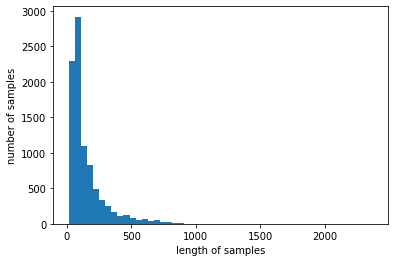

In [16]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [17]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [20]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [21]:
# 매핑 해줌
# 0 -> pad
# 1 -> sos
# 2 -> unk

for index, token in enumerate (("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

In [22]:
x_train[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [23]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [24]:
# train decoded
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [25]:
# test_decoded
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# 벡터화

In [27]:
# DTM
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [ ]:
# TF-IDF

In [28]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


# 머신러닝 모델

1. 나이브 베이즈
2. CNB
3. 로지스틱 회귀
4. SVM
5. 결정 트리
6. 랜덤 포레스트
7. 그레디언트 부스팅
8. 보팅(Voting)

test data tf-idf로 변환

정확도 측정

In [31]:
# test data tf-idf로 변환

# 정확도 측정

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환


In [32]:
def Naive_bayes_model(tfidfv, y_train, tfidfv_test, y_test):
    model = MultinomialNB()
    model.fit(tfidfv, y_train)

    predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [33]:
def CNB(tfidfv, y_train, tfidfv_test, y_test):
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교

In [34]:
def Logistic_reg(tfidfv, y_train, tfidfv_test, y_test):
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)

    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교

In [35]:
def SVM(tfidfv, y_train, tfidfv_test, y_test):
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    
    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("SVM 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교

In [36]:
def Decision_tree(tfidfv, y_train, tfidfv_test, y_test):
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    
    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교

In [37]:
def Random_forest(tfidfv, y_train, tfidfv_test, y_test):
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    
    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교

In [38]:
def GradientBoosting(tfidfv, y_train, tfidfv_test, y_test):
    grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
    grbt.fit(tfidfv, y_train)

    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교

In [42]:
def Voting(tfidfv, y_train, tfidfv_test, y_test):
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
    ], voting='soft')
    voting_classifier.fit(tfidfv, y_train)

    predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

In [45]:
Naive_bayes_model(tfidfv, y_train, tfidfv_test, y_test)

정확도: 0.6567230632235085


In [46]:
CNB(tfidfv, y_train, tfidfv_test, y_test)

CNB 정확도: 0.7707034728406055


In [47]:
Logistic_reg(tfidfv, y_train, tfidfv_test, y_test)

로지스틱 회귀 정확도: 0.8076580587711487


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
SVM(tfidfv, y_train, tfidfv_test, y_test)

SVM 정확도: 0.7666963490650045


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
Decision_tree(tfidfv, y_train, tfidfv_test, y_test)

결정 트리 정확도: 0.6202137132680321


In [50]:
Random_forest(tfidfv, y_train, tfidfv_test, y_test)

랜덤 포레스트 정확도: 0.674087266251113


In [51]:
GradientBoosting(tfidfv, y_train, tfidfv_test, y_test)

      Iter       Train Loss   Remaining Time 
         1           1.4608           13.95m
         2       95544.1548           14.00m
         3      105411.1055           13.93m
         4 26490374809120059619893320924222374741943986946048.0000           13.82m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.68m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.55m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.40m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.26m
         9 33324642592284536946719451054658203875213282035455263802212959137648421458664296

In [52]:
Voting(tfidfv, y_train, tfidfv_test, y_test)

정확도: 0.8165627782724845


## 5000개 사용

In [53]:
(x_train_5000, y_train_5000),(x_test_5000, y_test_5000) = reuters.load_data(num_words=5000, test_split=0.2)


In [54]:
decoded = []
for i in range(len(x_train_5000)):
    t = ' '.join([index_to_word[index] for index in x_train_5000[i]])
    decoded.append(t)

x_train_5000 = decoded

In [55]:
decoded = []
for i in range(len(x_test_5000)):
    t = ' '.join([index_to_word[index] for index in x_test_5000[i]])
    decoded.append(t)

x_test_5000 = decoded

In [56]:
dtmvector = CountVectorizer()
x_train_dtm_5000 = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [57]:
tfidf_transformer = TfidfTransformer()
tfidfv_5000 = tfidf_transformer.fit_transform(x_train_dtm_5000)
print(tfidfv_5000.shape)

(8982, 9670)


In [58]:
x_test_dtm_5000 = dtmvector.transform(x_test_5000) # 테스트 데이터를 DTM으로 변환
tfidfv_test_5000 = tfidf_transformer.transform(x_test_dtm_5000) # DTM을 TF-IDF 행렬로 변환

In [59]:
Naive_bayes_model(tfidfv, y_train, tfidfv_test, y_test)
CNB(tfidfv, y_train, tfidfv_test, y_test)
Logistic_reg(tfidfv, y_train, tfidfv_test, y_test)
SVM(tfidfv, y_train, tfidfv_test, y_test)
Decision_tree(tfidfv, y_train, tfidfv_test, y_test)
Random_forest(tfidfv, y_train, tfidfv_test, y_test)
GradientBoosting(tfidfv, y_train, tfidfv_test, y_test)
Voting(tfidfv, y_train, tfidfv_test, y_test)

정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8076580587711487


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7773820124666073
결정 트리 정확도: 0.6202137132680321
랜덤 포레스트 정확도: 0.674087266251113
      Iter       Train Loss   Remaining Time 
         1           1.4608           13.92m
         2       95544.1548           13.92m
         3      105411.1055           13.76m
         4 26490374809120059619893320924222374741943986946048.0000           13.68m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.58m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.46m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.32m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.19m
  

## 1000개 사용

In [82]:
(x_train_1000, y_train_1000),(x_test_1000, y_test_1000) = reuters.load_data(num_words=1000, test_split=0.2)


In [83]:
decoded = []
for i in range(len(x_train_1000)):
    t = ' '.join([index_to_word[index] for index in x_train_1000[i]])
    decoded.append(t)

x_train_1000 = decoded

In [84]:
decoded = []
for i in range(len(x_test_1000)):
    t = ' '.join([index_to_word[index] for index in x_test_1000[i]])
    decoded.append(t)

x_test_1000 = decoded

In [85]:
dtmvector = CountVectorizer()
x_train_dtm_1000 = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [86]:
tfidf_transformer = TfidfTransformer()
tfidfv_1000 = tfidf_transformer.fit_transform(x_train_dtm_1000)
print(tfidfv_1000.shape)

(8982, 9670)


In [87]:
x_test_dtm_1000 = dtmvector.transform(x_test_1000) # 테스트 데이터를 DTM으로 변환
tfidfv_test_1000 = tfidf_transformer.transform(x_test_dtm_1000) # DTM을 TF-IDF 행렬로 변환

In [88]:
Naive_bayes_model(tfidfv, y_train, tfidfv_test, y_test)
CNB(tfidfv, y_train, tfidfv_test, y_test)
Logistic_reg(tfidfv, y_train, tfidfv_test, y_test)
SVM(tfidfv, y_train, tfidfv_test, y_test)
Decision_tree(tfidfv, y_train, tfidfv_test, y_test)
Random_forest(tfidfv, y_train, tfidfv_test, y_test)
GradientBoosting(tfidfv, y_train, tfidfv_test, y_test)
Voting(tfidfv, y_train, tfidfv_test, y_test)

정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도: 0.8076580587711487


/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM 정확도: 0.7666963490650045
결정 트리 정확도: 0.6202137132680321
랜덤 포레스트 정확도: 0.674087266251113
      Iter       Train Loss   Remaining Time 
         1           1.4608           14.32m
         2       95544.1548           14.43m
         3      105411.1055           14.29m
         4 26490374809120059619893320924222374741943986946048.0000           14.12m
         5 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.99m
         6 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.85m
         7 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.72m
         8 3332464259228453694671945105465820387521328203545526380221295913764842145866429631276902168311601749602693928777633481065758720.0000           13.56m
  

# 딥러닝 모델

In [60]:
from tensorflow import keras

In [126]:
vocab_size = 10000
word_vector_dim = 32 

model_dense = keras.Sequential()
model_dense.add(keras.layers.Dense(128, activation='relu', input_shape=(tfidfv.shape[1],)))  
model_dense.add(keras.layers.Dense(128, activation='relu')) 
model_dense.add(keras.layers.Dense(256, activation='relu')) 
model_dense.add(keras.layers.Dense(512, activation='relu'))  
model_dense.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_dense.summary()
    


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               1237888   
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_25 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_26 (Dense)             (None, 46)                23598     
Total params: 1,442,606
Trainable params: 1,442,606
Non-trainable params: 0
_________________________________________________________________


In [127]:
tfidfv_10000_arr = tfidfv.toarray()
tfidfv_10000_dense = tfidfv.todense()

In [128]:
tfidfv_test_10000_arr = tfidfv_test.toarray()
tfidfv_test_10000_dense = tfidfv_test.todense()

In [129]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


In [130]:
model_dense.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

epochs=20
batch_size=128

history_dense = model_dense.fit(tfidfv_10000_dense,
                                y_train,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

Epoch 1/20
57/57 [==============================] - 1s 10ms/step - loss: 2.3204 - accuracy: 0.4213 - val_loss: 1.5866 - val_accuracy: 0.5826
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 1.3421 - accuracy: 0.6685 - val_loss: 1.1954 - val_accuracy: 0.7067
Epoch 3/20
57/57 [==============================] - 0s 5ms/step - loss: 0.9030 - accuracy: 0.7708 - val_loss: 1.0883 - val_accuracy: 0.7529
Epoch 4/20
57/57 [==============================] - 0s 5ms/step - loss: 0.5699 - accuracy: 0.8565 - val_loss: 1.1162 - val_accuracy: 0.7624
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 0.3821 - accuracy: 0.8956 - val_loss: 1.1156 - val_accuracy: 0.7607
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 0.2671 - accuracy: 0.9272 - val_loss: 1.2037 - val_accuracy: 0.7746
Epoch 7/20
57/57 [==============================] - 0s 5ms/step - loss: 0.2147 - accuracy: 0.9427 - val_loss: 1.3035 - val_accuracy: 0.7691
Epoch 00007: early 

In [131]:
results = model_dense.evaluate(tfidfv_test_5000_dense,  y_test_5000, verbose=2)
print(results)

71/71 - 0s - loss: 1.3082 - accuracy: 0.7649
[1.3082101345062256, 0.764915406703949]
